In [19]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase
import matplotlib as mpl
import seaborn as sns

from poly_graphs_lib.database import PASSWORD,DBMS_NAME,LOCATION,DB_NAME
from poly_graphs_lib.utils import PROJECT_DIR
from poly_graphs_lib.utils.periodic_table import atomic_symbols

In [2]:
# This statement Connects to the database server
connection = GraphDatabase.driver(LOCATION, auth=(DBMS_NAME, PASSWORD))
# To read and write to the data base you must open a session
session = connection.session(database=DB_NAME)

reports_dir=os.path.join(PROJECT_DIR,'reports',DB_NAME)

In [3]:
center_class = 'chemenv'
execute_statement = f'MATCH (c:{center_class})-[r]-(e:Element) RETURN c.name AS ChemEnv, e.name AS Element, r.weight AS Weight'
data = session.run(execute_statement).data()
data
# print(len(data))

[{'ChemEnv': 'T_4', 'Element': 'Ac', 'Weight': 2},
 {'ChemEnv': 'DDPN_8', 'Element': 'Ac', 'Weight': 16},
 {'ChemEnv': 'TT_1_9', 'Element': 'Ac', 'Weight': 4},
 {'ChemEnv': 'C_8', 'Element': 'Ac', 'Weight': 5},
 {'ChemEnv': 'AC_12', 'Element': 'Ac', 'Weight': 33},
 {'ChemEnv': 'C_12', 'Element': 'Ac', 'Weight': 3},
 {'ChemEnv': 'T_6', 'Element': 'Ac', 'Weight': 6},
 {'ChemEnv': 'FO_7', 'Element': 'Ac', 'Weight': 2},
 {'ChemEnv': 'TT_2_9', 'Element': 'Ag', 'Weight': 4},
 {'ChemEnv': 'TS_3', 'Element': 'Ag', 'Weight': 4},
 {'ChemEnv': 'A_2', 'Element': 'Ag', 'Weight': 8},
 {'ChemEnv': 'PB_7', 'Element': 'Ag', 'Weight': 6},
 {'ChemEnv': 'SS_4', 'Element': 'Ag', 'Weight': 4},
 {'ChemEnv': 'O_6', 'Element': 'Ag', 'Weight': 13},
 {'ChemEnv': 'L_2', 'Element': 'Ag', 'Weight': 16},
 {'ChemEnv': 'TL_3', 'Element': 'Ag', 'Weight': 2},
 {'ChemEnv': 'PBP_12', 'Element': 'Ag', 'Weight': 12},
 {'ChemEnv': 'T_6', 'Element': 'Ag', 'Weight': 2},
 {'ChemEnv': 'SBT_8', 'Element': 'Ag', 'Weight': 1},
 {'C

In [9]:
# 2. Extract all unique ChemEnv and Element names
all_chemenvs = sorted(list(set([relationship['ChemEnv'] for relationship in data])))
# all_elements = sorted(list(set([relationship['Element'] for relationship in data])))

# all_chemenvs = list(set([relationship['ChemEnv'] for relationship in data]))
all_elements = atomic_symbols[1:100]

# 3. Initialize matrix of zeros
import numpy as np
matrix = np.zeros((len(all_chemenvs), len(all_elements)))

# 4. Set matrix cells to 1 for each relationship
for relationship in data:
    chemenv_idx = all_chemenvs.index(relationship['ChemEnv'])
    element_idx = all_elements.index(relationship['Element'])
    matrix[chemenv_idx,element_idx]=relationship['Weight']
matrix

array([[ 91.,   0.,  79., ...,   0.,
          0.,   0.],
       [204.,   0.,   0., ...,   0.,
          0.,   0.],
       [ 16.,   0.,   8., ...,   0.,
          0.,   0.],
       ...,
       [ 90.,   0.,  20., ...,   0.,
          0.,   0.],
       [  0.,   0.,   0., ...,   0.,
          0.,   0.],
       [  0.,   0.,   0., ...,   0.,
          0.,   0.]])

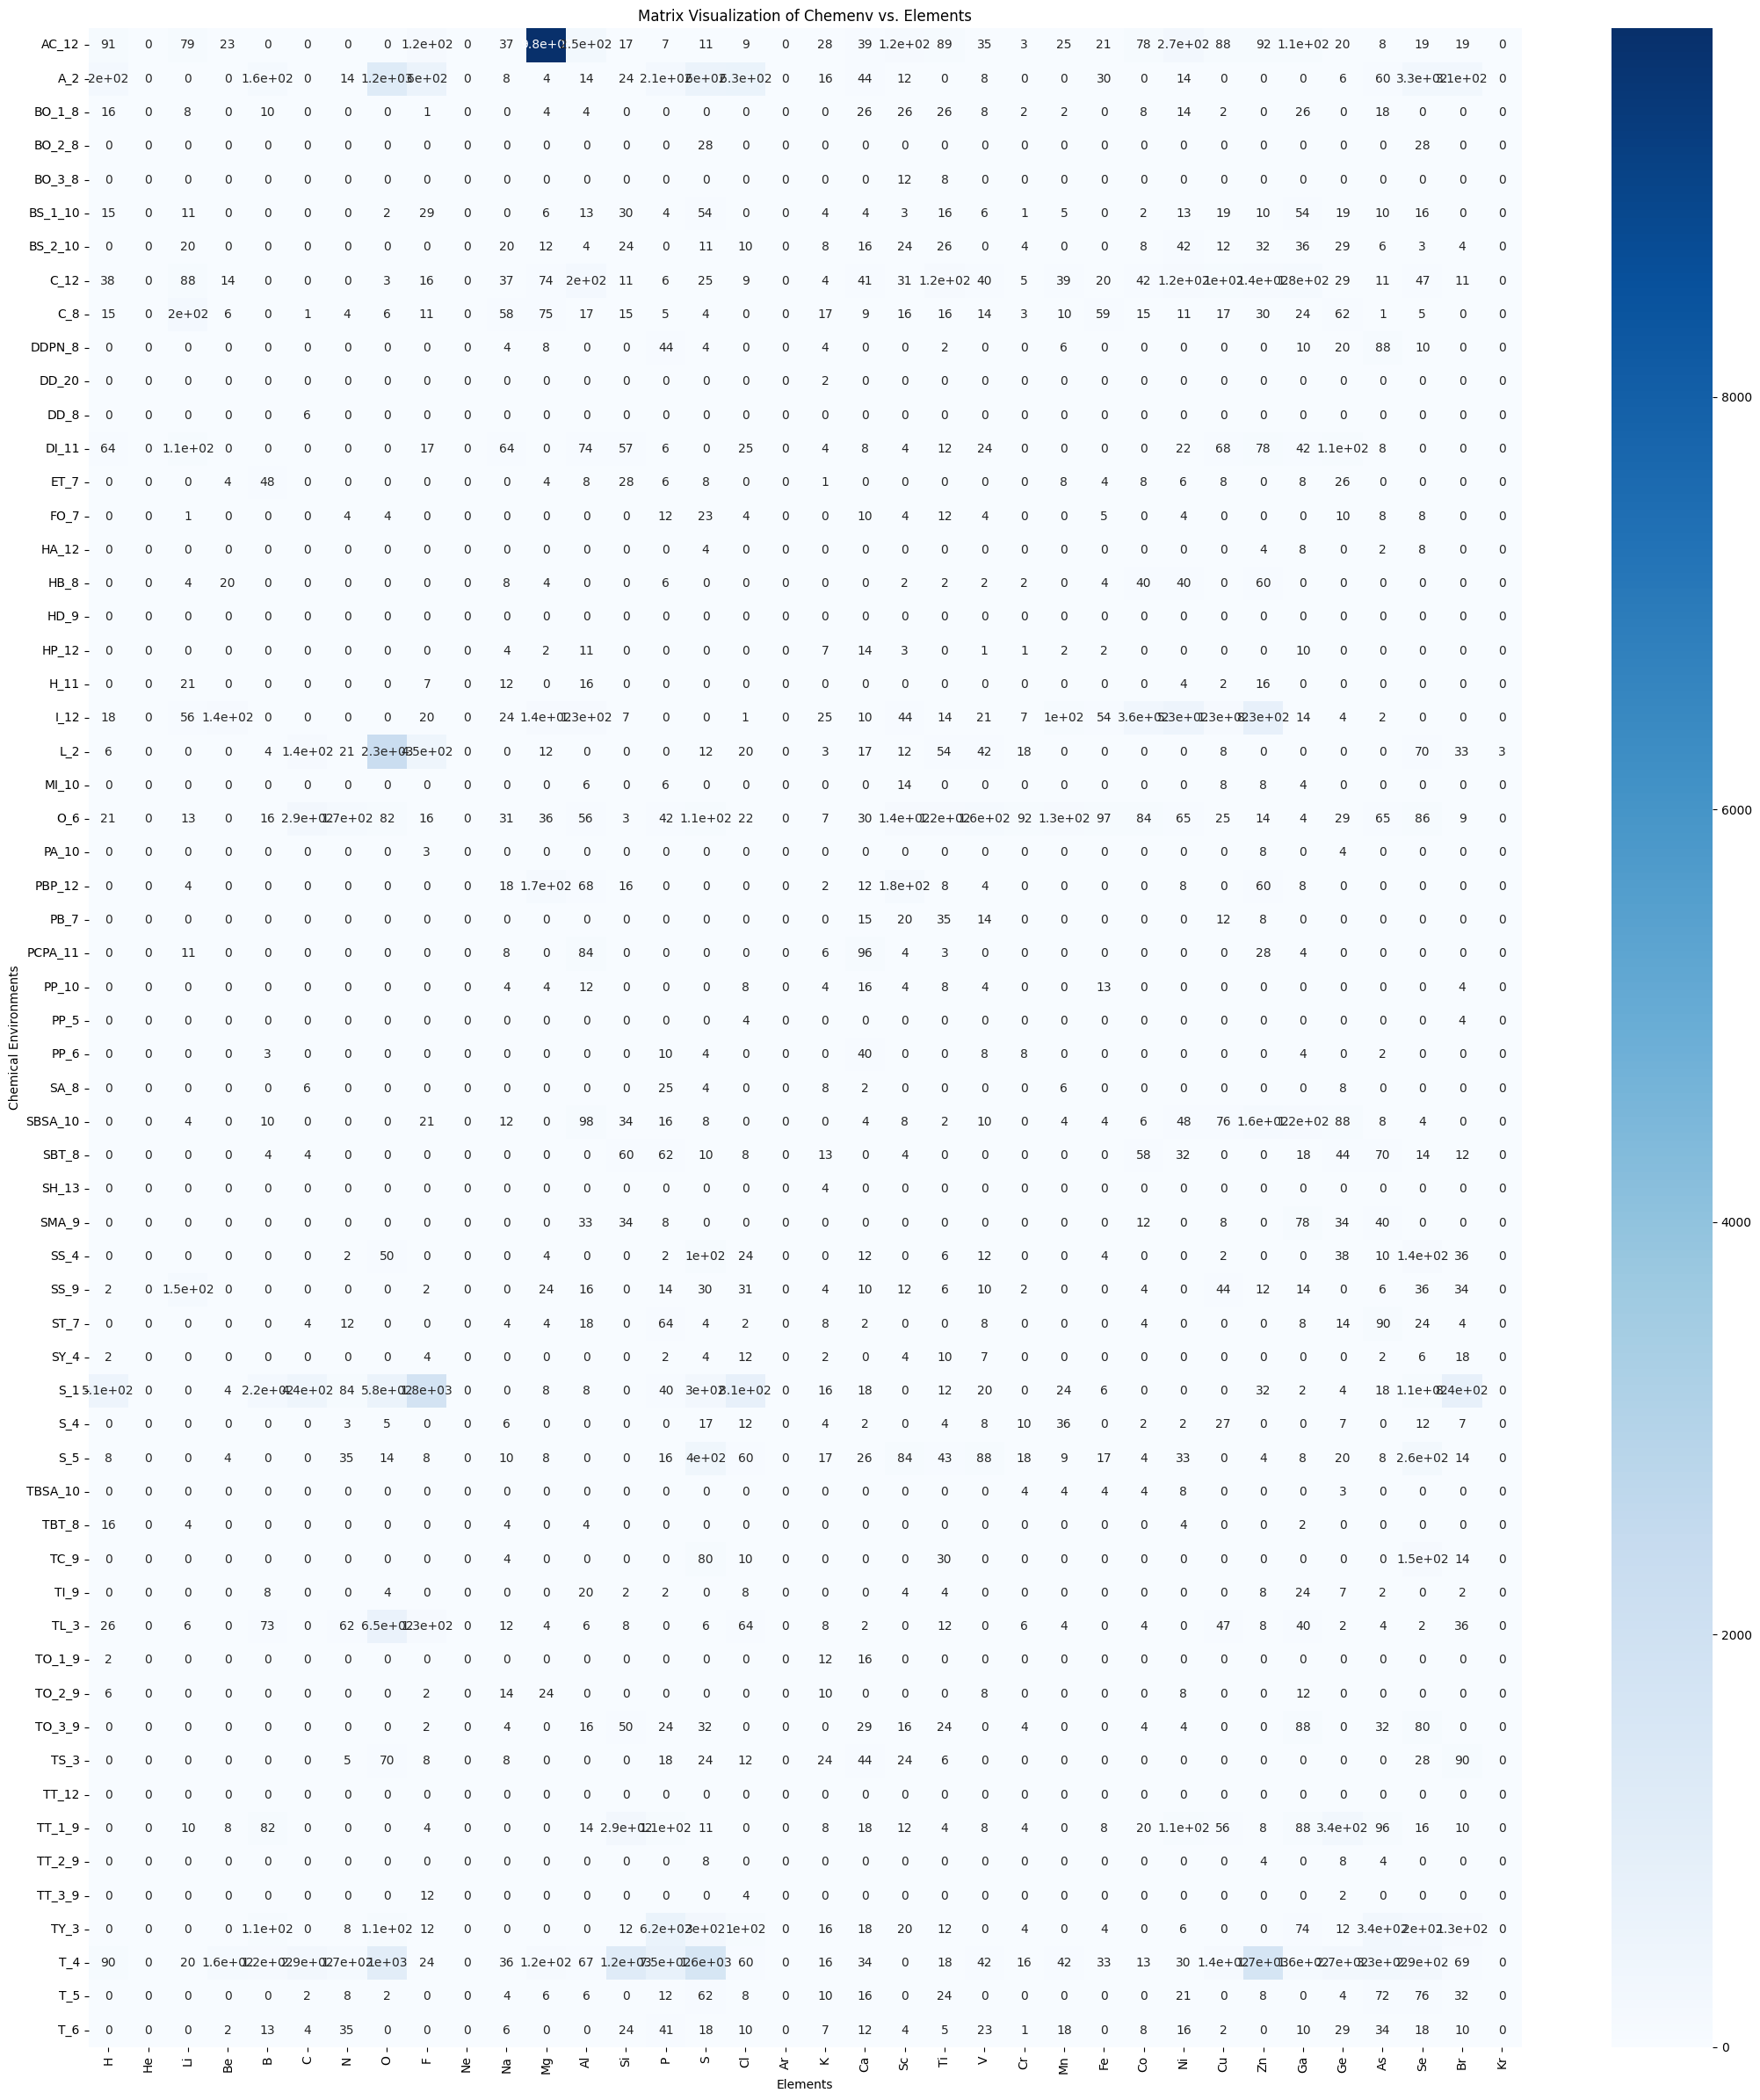

In [12]:

chemenv_labels=all_chemenvs
element_labels=all_elements[:36]
plot_matrix=matrix[:,:36]
plt.figure(figsize=(max(20, len(element_labels) * 0.6), max(15, len(chemenv_labels) * 0.4)))
    
# Draw the heatmap
sns.heatmap(plot_matrix, annot=True, cmap="Blues", cbar=True, xticklabels=element_labels, yticklabels=chemenv_labels)

plt.xlabel('Elements')
plt.ylabel('Chemical Environments')
plt.title('Matrix Visualization of Chemenv vs. Elements')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout for better fit
plt.show()

In [21]:
center_class = 'chemenv'
execute_statement = f'MATCH (c:{center_class})-[r]-(e:chemenv) RETURN c.name AS ChemEnv, e.name AS ChemEnv_nn, r.weight AS Weight'
data_chemenv_chemenv = session.run(execute_statement).data()
data_chemenv_chemenv

[{'ChemEnv': 'A_2', 'ChemEnv_nn': 'I_12', 'Weight': 440},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'HD_9', 'Weight': 32},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TT_3_9', 'Weight': 48},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'SBSA_10', 'Weight': 232},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'PCPA_11', 'Weight': 216},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'HB_8', 'Weight': 128},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TT_1_9', 'Weight': 740},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'PBP_12', 'Weight': 104},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TS_3', 'Weight': 1132},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'O_6', 'Weight': 5098},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TY_3', 'Weight': 2892},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'T_4', 'Weight': 6700},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'H_11', 'Weight': 16},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TO_2_9', 'Weight': 16},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'BO_1_8', 'Weight': 16},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'TO_3_9', 'Weight': 24},
 {'ChemEnv': 'A_2', 'ChemEnv_nn': 'BO_3_8', 'Weight': 32},

In [27]:
# 2. Extract all unique ChemEnv and Element names
all_chemenvs = sorted(list(set([relationship['ChemEnv'] for relationship in data_chemenv_chemenv])))


# 3. Initialize matrix of zeros
import numpy as np
chemenv_nn_matrix = np.zeros((len(all_chemenvs), len(all_chemenvs)))

# 4. Set matrix cells to 1 for each relationship
for relationship in data_chemenv_chemenv:
    chemenv_idx = all_chemenvs.index(relationship['ChemEnv'])
    element_idx = all_chemenvs.index(relationship['ChemEnv_nn'])
    chemenv_nn_matrix[chemenv_idx,element_idx]=relationship['Weight']
chemenv_nn_matrix

array([[3.426e+04, 1.506e+03,
        1.040e+02, ..., 5.020e+02,
        1.200e+01, 9.680e+02],
       [1.506e+03, 5.962e+03,
        1.600e+01, ..., 6.700e+03,
        1.080e+02, 9.280e+02],
       [1.040e+02, 1.600e+01,
        1.068e+03, ..., 8.000e+00,
        1.716e+03, 8.640e+02],
       ...,
       [5.020e+02, 6.700e+03,
        8.000e+00, ..., 2.275e+04,
        1.660e+03, 1.436e+03],
       [1.200e+01, 1.080e+02,
        1.716e+03, ..., 1.660e+03,
        3.246e+03, 1.200e+01],
       [9.680e+02, 9.280e+02,
        8.640e+02, ..., 1.436e+03,
        1.200e+01, 3.476e+03]])

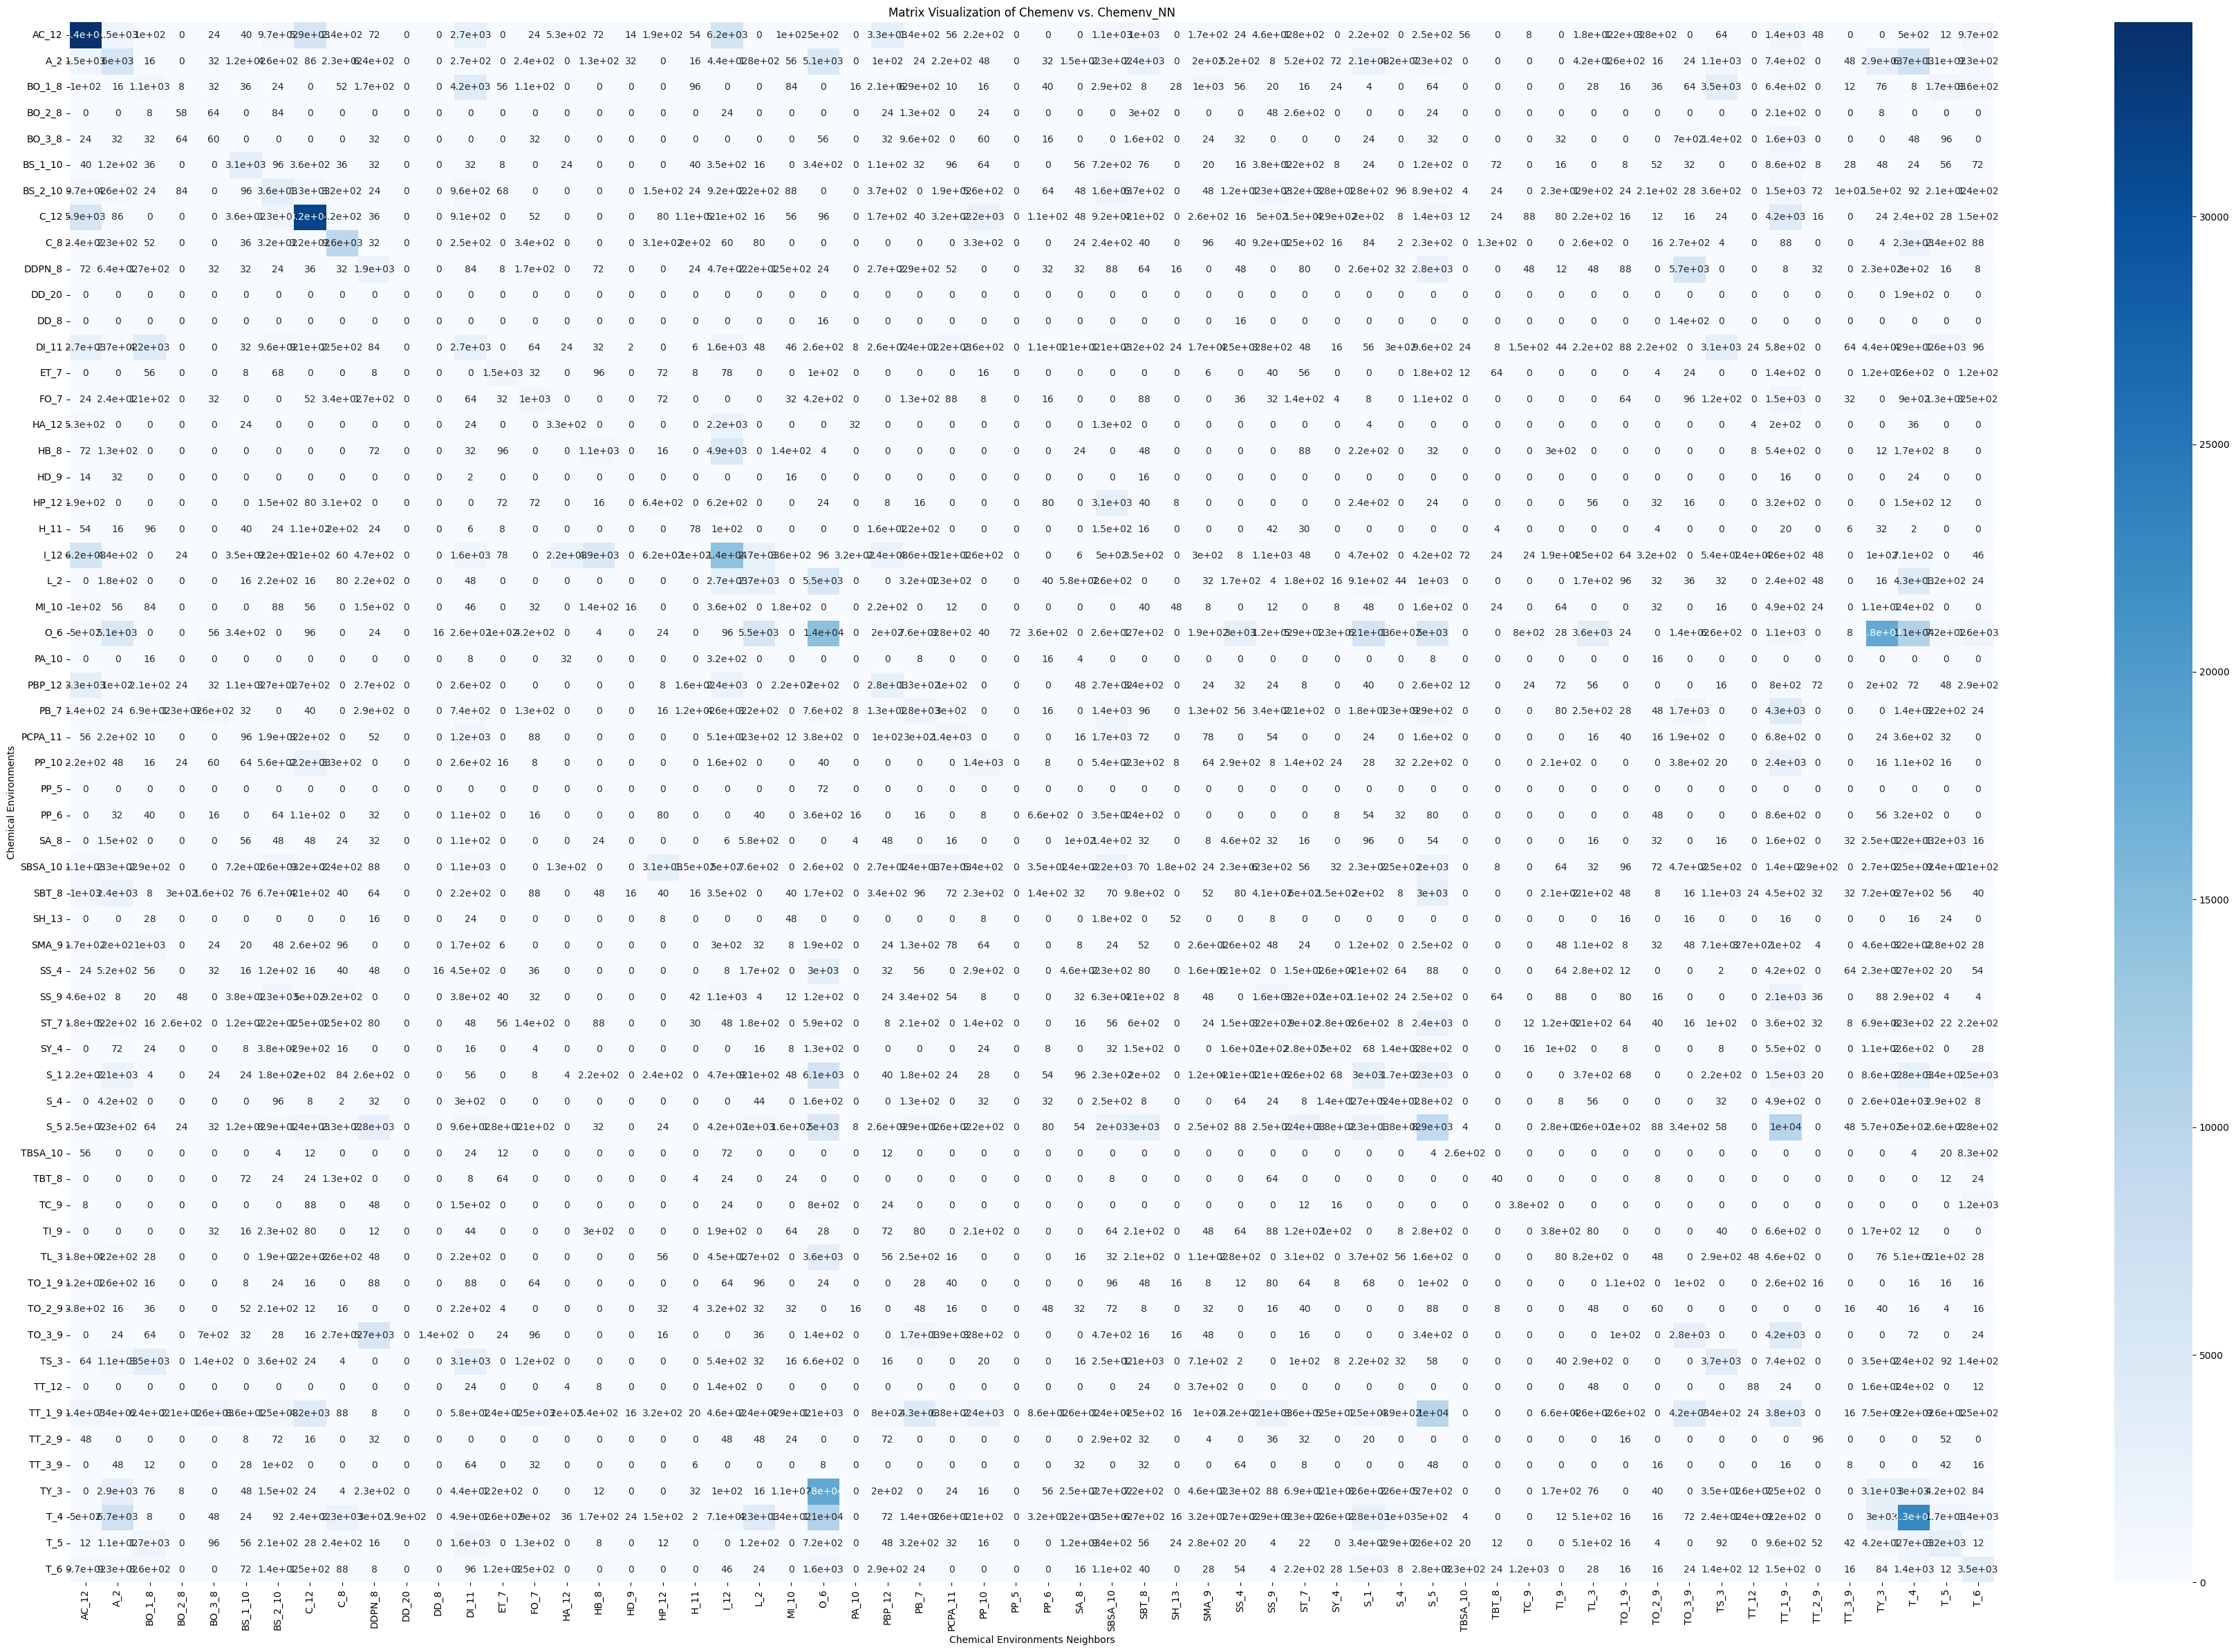

In [28]:
chemenv_labels=all_chemenvs
chemenv_nn_labels=all_chemenvs
plot_matrix=chemenv_nn_matrix[:,:]
plt.figure(figsize=(max(20, len(chemenv_nn_labels) * 0.6), max(15, len(chemenv_labels) * 0.4)))
    
# Draw the heatmap
sns.heatmap(plot_matrix, annot=True, cmap="Blues", cbar=True, xticklabels=chemenv_nn_labels, yticklabels=chemenv_labels)

plt.xlabel('Chemical Environments Neighbors')
plt.ylabel('Chemical Environments')
plt.title('Matrix Visualization of Chemenv vs. Chemenv_NN')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout for better fit
plt.show()

# Chord Diagram

In [16]:
import holoviews as hv
from holoviews import opts, dim
import pandas as pd

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
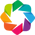

(60, 60)


:Chord   [source,target]   (value)

In [34]:
hv.extension('bokeh')

def plot_chord(matrix, labels):
    """
    Plots a Chord diagram based on the given matrix and labels.

    Parameters:
    - matrix: A 2D numpy array representing the relationships (or weights) between labels.
    - labels: List of labels for the matrix.
    """

    # Create a dataframe from the matrix
    df = pd.DataFrame(matrix, columns=labels, index=labels).stack().reset_index()
    df.columns = ['source', 'target', 'value']

    # Filter out zero values to avoid drawing unnecessary chords
    df = df[df['value'] != 0]

    # Create the Chord diagram
    chord = hv.Chord(df)
    chord.opts(
        opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
                   labels='labels', node_color=dim('index').str(),label_text_font_size='12pt', label_text_color='black')
    )
    return chord

print(chemenv_nn_matrix.shape)
plot_chord(chemenv_nn_matrix, all_chemenvs)

# Force Directed Graph

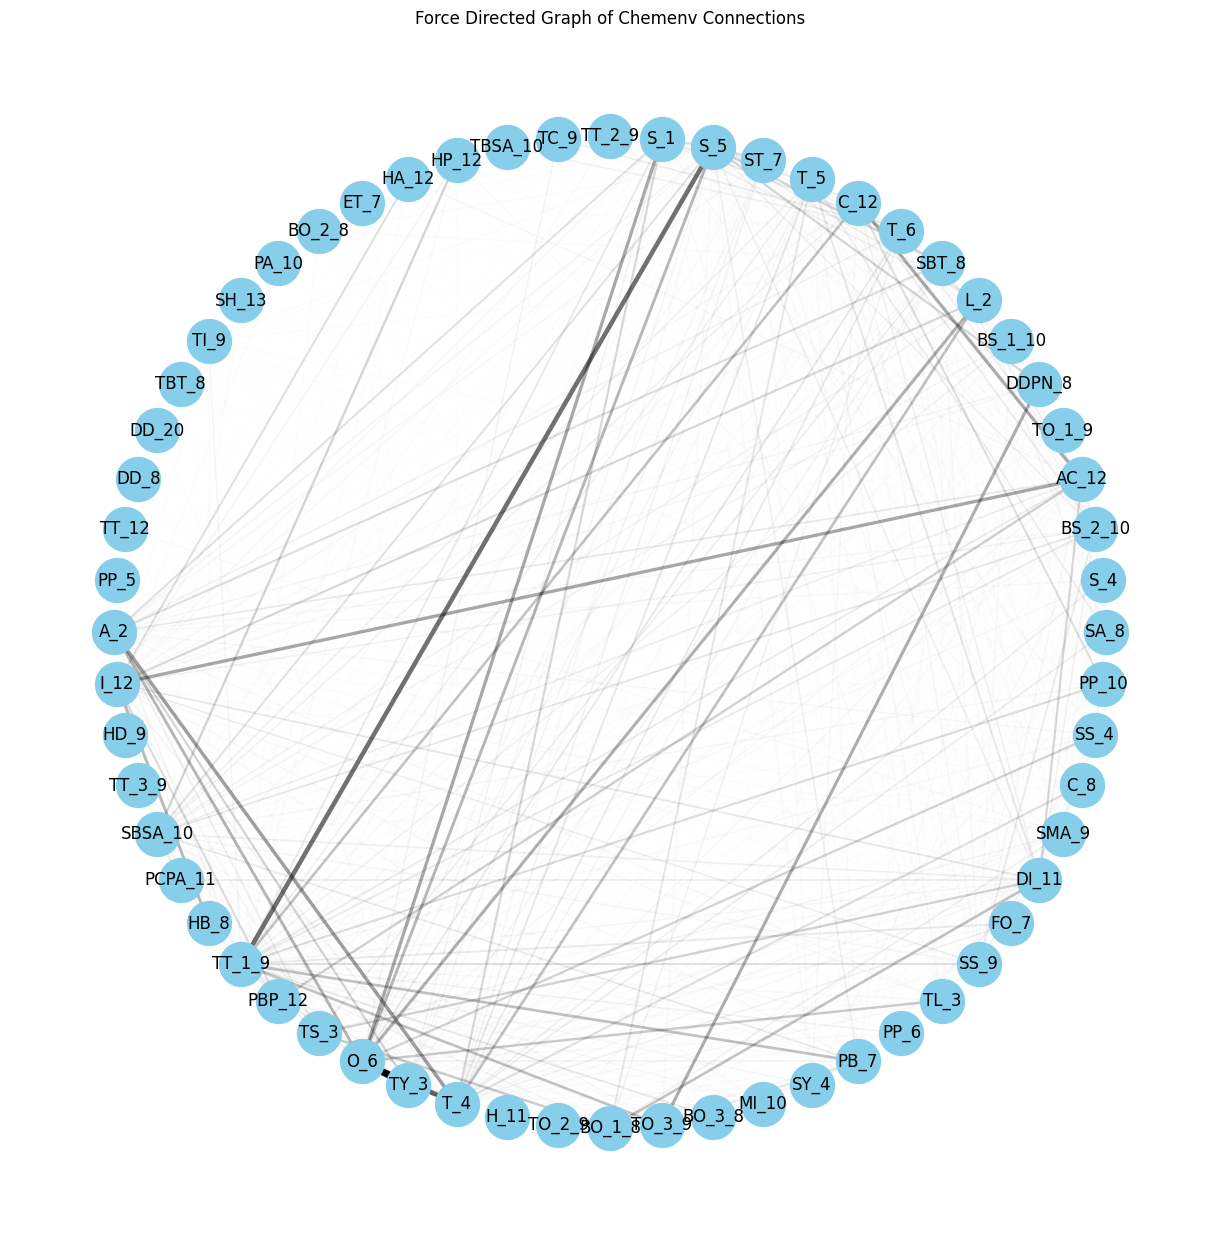

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_force_directed_chemenv(session):
    # 1. Fetch relationships between chemenv nodes using Cypher
    execute_statement = "MATCH (c1:chemenv)-[r]-(c2:chemenv) WHERE NOT c1 = c2 RETURN c1.name AS Source, c2.name AS Target, r.weight AS Weight"
    # execute_statement = "MATCH (c1:chemenv)-[r]-(c2:chemenv) WHERE NOT center = surrounding RETURN c1.name AS Source, c2.name AS Target, r.weight AS Weight"
    data = session.run(execute_statement).data()

    # 2. Create a networkx graph and add nodes and edges
    G = nx.Graph()
    for relationship in data:
        source = relationship['Source']
        target = relationship['Target']
        weight = relationship['Weight']
        G.add_edge(source, target, weight=weight)
    # Normalize edge widths based on weight
    min_width = 1
    max_width = 5
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    min_weight = min(weights)
    max_weight = max(weights)
    normalized_weights = [min_width + (w - min_weight) * (max_width - min_width) / (max_weight - min_weight) for w in weights]
    opacities = [(w - min_weight) / (max_weight - min_weight) for w in weights]

    # # Color nodes based on their label (chemenv or Element)
    # color_map = {'chemenv': 'skyblue', 'Element': 'salmon'}
    # print(G.nodes()[0].keys())
    # node_colors = [color_map[G.nodes[node]['label']] for node in G.nodes()]

    # Adjust edge colors for opacities
    edge_colors = [(0, 0, 0, opacity) for opacity in opacities]  # Using black color with varying opacity
    plt.figure(figsize=(12, 12))
    # pos = nx.spring_layout(G, 0.5)  # k adjusts the optimal distance between nodes. Play with it for best visualization.

    pos=nx.shell_layout(G)
    # pos=nx.bipartite_layout(G)
    

    nx.draw(G, pos, with_labels=True, node_size=1000, font_size=12, width=normalized_weights,node_color='skyblue', edge_color=edge_colors)
    
    plt.title('Force Directed Graph of Chemenv Connections')
    plt.show()

plot_force_directed_chemenv(session)

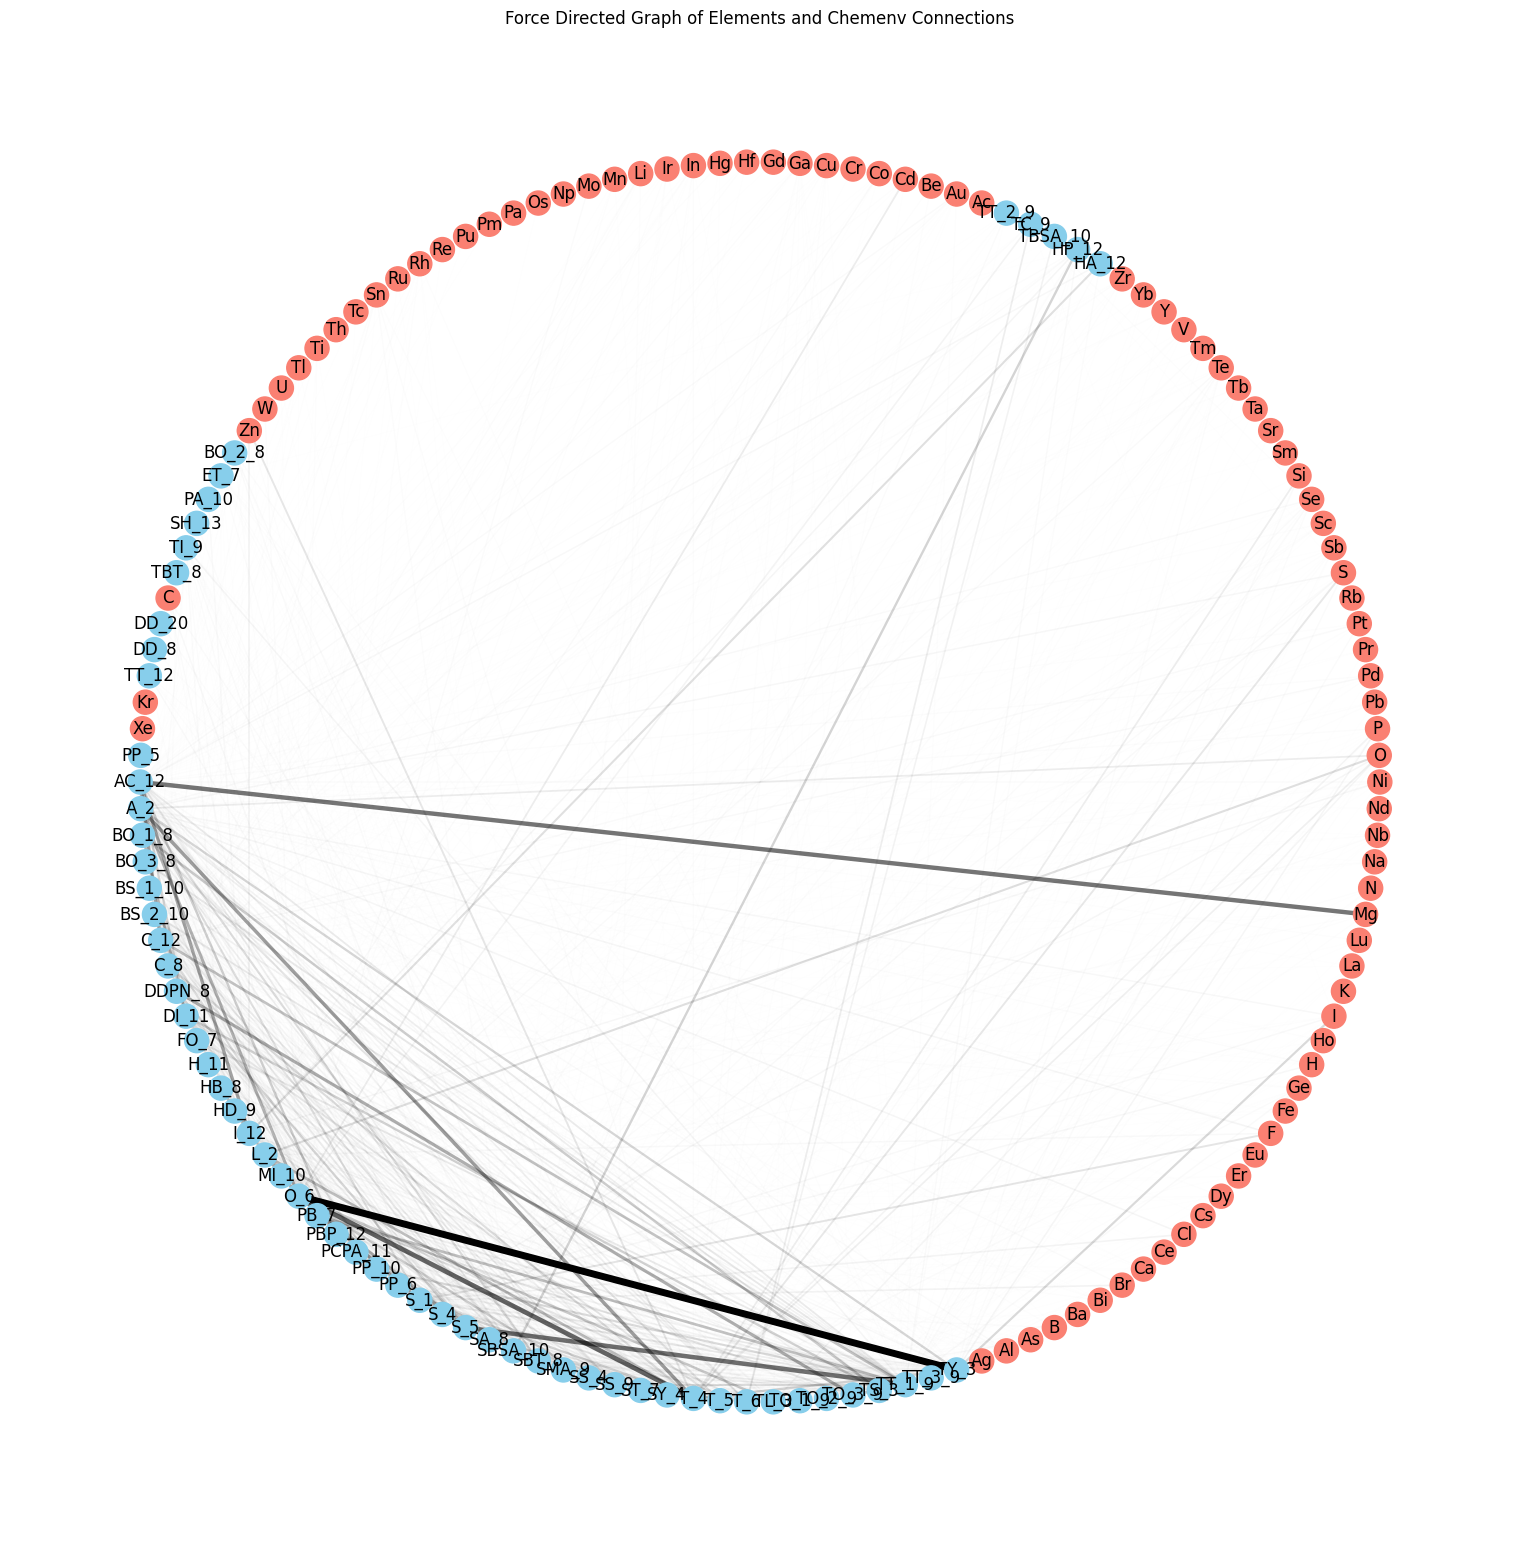

In [104]:
def plot_force_directed_graph(session):
    # 1. Fetch relationships using Cypher
    execute_statement = """MATCH (n)-[r]-(m) WHERE (n:chemenv AND m:chemenv AND NOT m=n) OR (n:Element AND m:chemenv) RETURN n.name AS Source, labels(n)[0] AS SourceLabel, m.name AS Target, labels(m)[0] AS TargetLabel, r.weight AS Weight
    """
    data = session.run(execute_statement).data()

    # 2. Create a networkx graph and add nodes and edges
    G = nx.Graph()
    for relationship in data:
        source = relationship['Source']
        source_label = relationship['SourceLabel']
        target = relationship['Target']
        target_label = relationship['TargetLabel']
        weight = relationship['Weight']
        G.add_node(source, label=source_label)
        G.add_node(target, label=target_label)
        G.add_edge(source, target, weight=weight)

    # Normalize edge widths based on weight
    min_width = 1
    max_width = 5
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    min_weight = min(weights)
    max_weight = max(weights)
    normalized_weights = [min_width + (w - min_weight) * (max_width - min_width) / (max_weight - min_weight) for w in weights]
    opacities = [(w - min_weight) / (max_weight - min_weight) for w in weights]

    # Color nodes based on their label (chemenv or Element)
    color_map = {'chemenv': 'skyblue', 'Element': 'salmon'}
    node_colors = [color_map[G.nodes[node]['label']] for node in G.nodes()]

    # Adjust edge colors for opacities
    edge_colors = [(0, 0, 0, opacity) for opacity in opacities]  # Using black color with varying opacity


    # 3. Visualize the graph
    plt.figure(figsize=(15, 15))
    # pos = nx.spring_layout(G, k=0.5)
    pos=nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=12, node_color=node_colors, 
            width=normalized_weights, edge_color=edge_colors)
    
    plt.title('Force Directed Graph of Elements and Chemenv Connections')
    plt.show()

# Example usage:
plot_force_directed_graph(session)

[{'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'TY_3', 'Element': 'I'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'L_2', 'Element': 'O'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'S_1', 'Element': 'F'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'T_4', 'Element': 'Zn'}, {'Center': 'C', 'ChemEnv': 'T_4', 'ChemEnv_NN': 'T_4', 'Element': 'Zn'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'T_4', 'Element': 'S'}, {'Center': 'C', 'ChemEnv': 'T_4', 'ChemEnv_NN': 'T_4', 'Element': 'S'}, {'Center': 'C', 'ChemEnv': 'S_1', 'ChemEnv_NN': 'O_6', 'Element': 'Cd'}, {'Center': 'C', 'ChemEnv': 'T_4', 'ChemEnv_NN': 'O_6', 'Element': 'Cd'}, {'Center': 'C', 'ChemEnv': 'L_2', 'ChemEnv_NN': 'O_6', 'Element': 'Cd'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'O_6', 'Element': 'Cd'}, {'Center': 'C', 'ChemEnv': 'T_4', 'ChemEnv_NN': 'A_2', 'Element': 'O'}, {'Center': 'C', 'ChemEnv': 'O_6', 'ChemEnv_NN': 'T_4', 'Element': 'Si'}, {'Center': 'C', 'ChemEnv': 'T_4', 'ChemEnv_NN': 'T_4', 

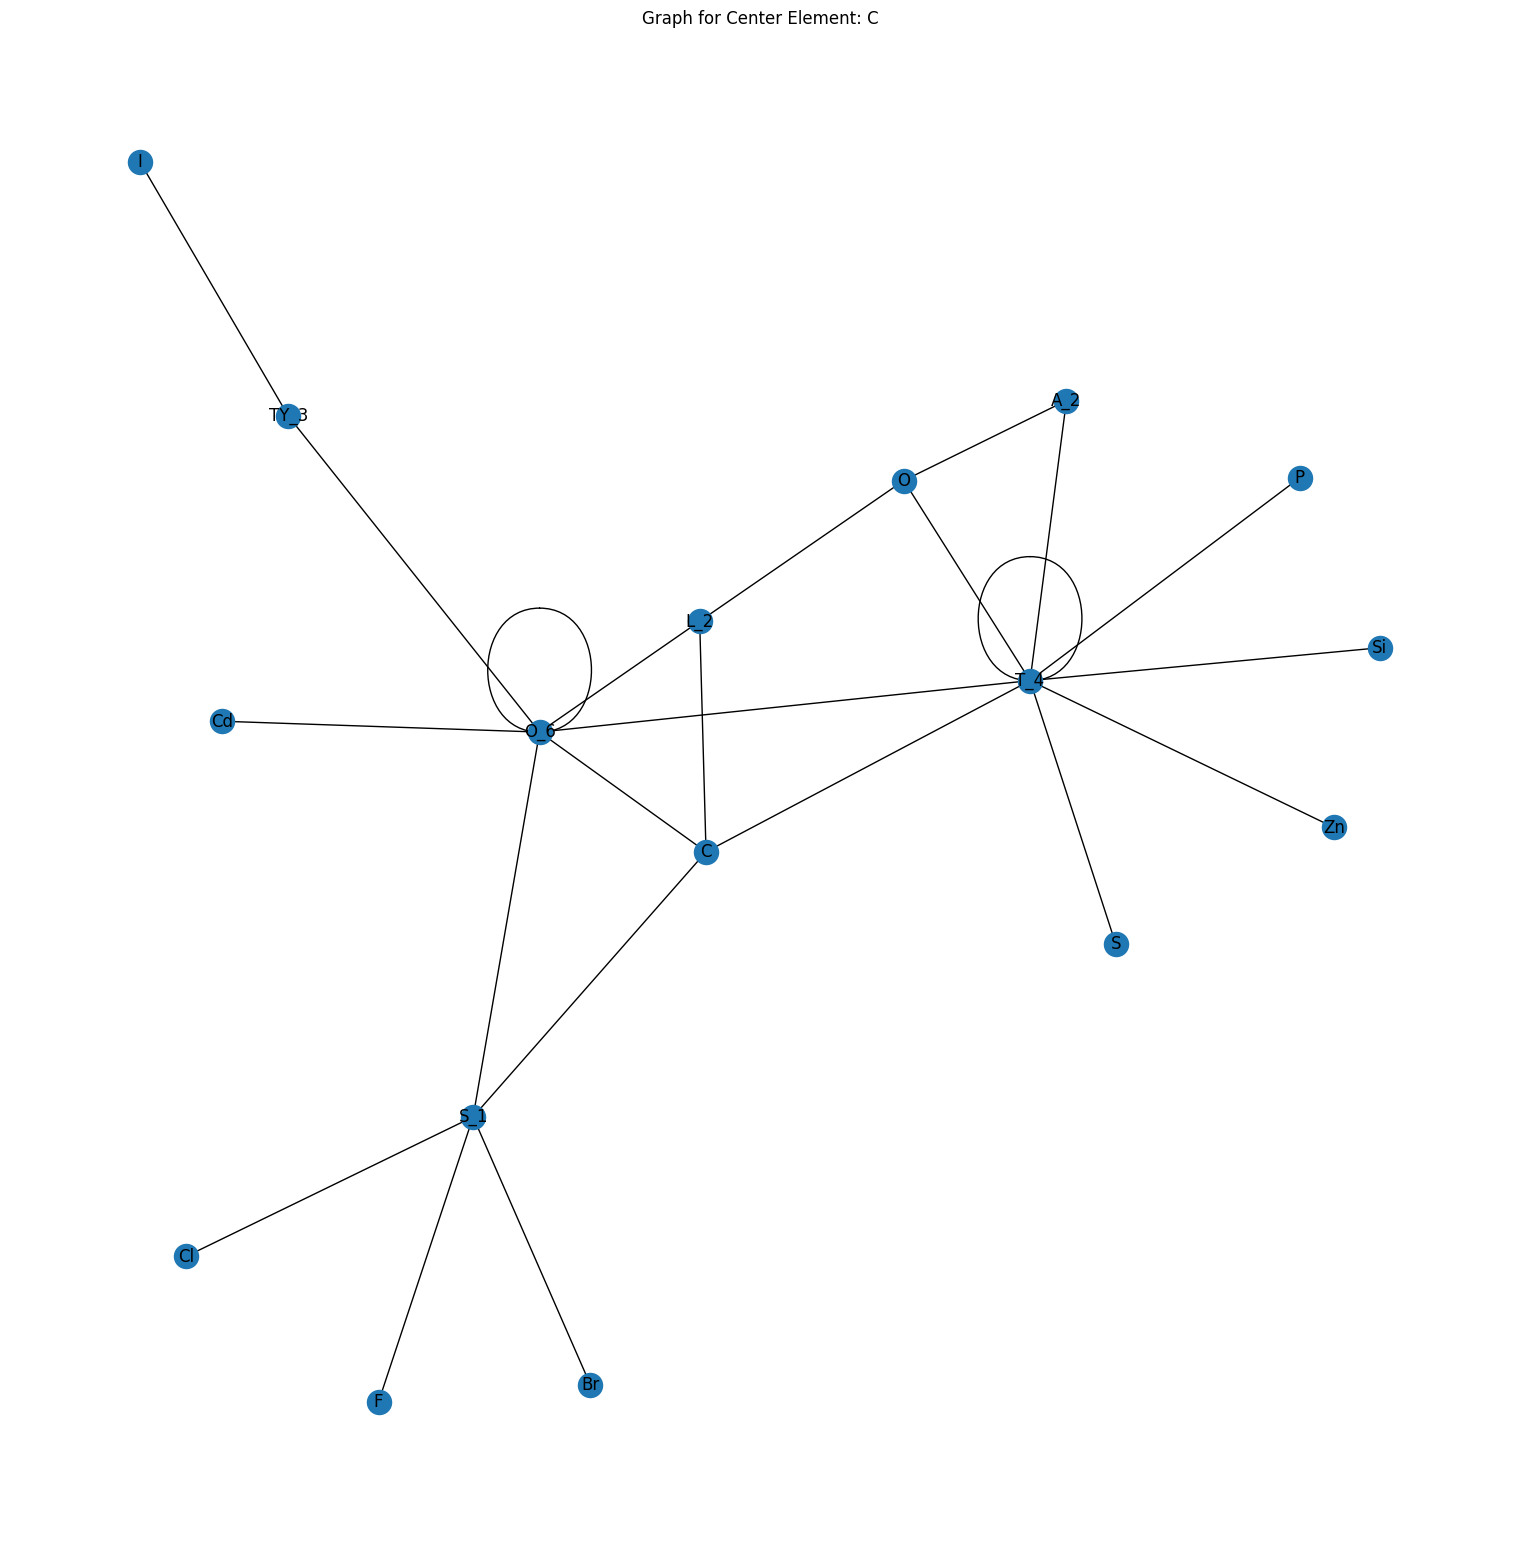

In [176]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_center_element_graph(session, element_name):
    # Fetch data using Cypher
    execute_statement = f"""MATCH (center:Element {{name: '{element_name}'}})-[r1]-(c:chemenv)
    WITH center, c ORDER BY r1.weight DESC LIMIT 5
    MATCH (c)-[r2]-(c2:chemenv) WITH c,c2,center ORDER BY r2.weight DESC LIMIT 10
    MATCH (c2)-[r3]-(e:Element) WITH c,c2,center,e ORDER BY r3.weight DESC LIMIT 20
    RETURN center.name AS Center, c.name AS ChemEnv, c2.name AS ChemEnv_NN, e.name AS Element 
    """

    data = session.run(execute_statement).data()
    print(data)
    # Create a networkx graph
    G = nx.Graph()
    for relationship in data:
        center = relationship['Center']
        chemenv = relationship['ChemEnv']
        chemenv_nn = relationship['ChemEnv_NN']
        element = relationship['Element']
        G.add_edge(center, chemenv)
        G.add_edge(chemenv, chemenv_nn)
        G.add_edge(chemenv_nn, element)

    # Visualize the graph
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=12)
    plt.title(f'Graph for Center Element: {element_name}')
    plt.show()

# Example usage:
plot_center_element_graph(session, 'C')

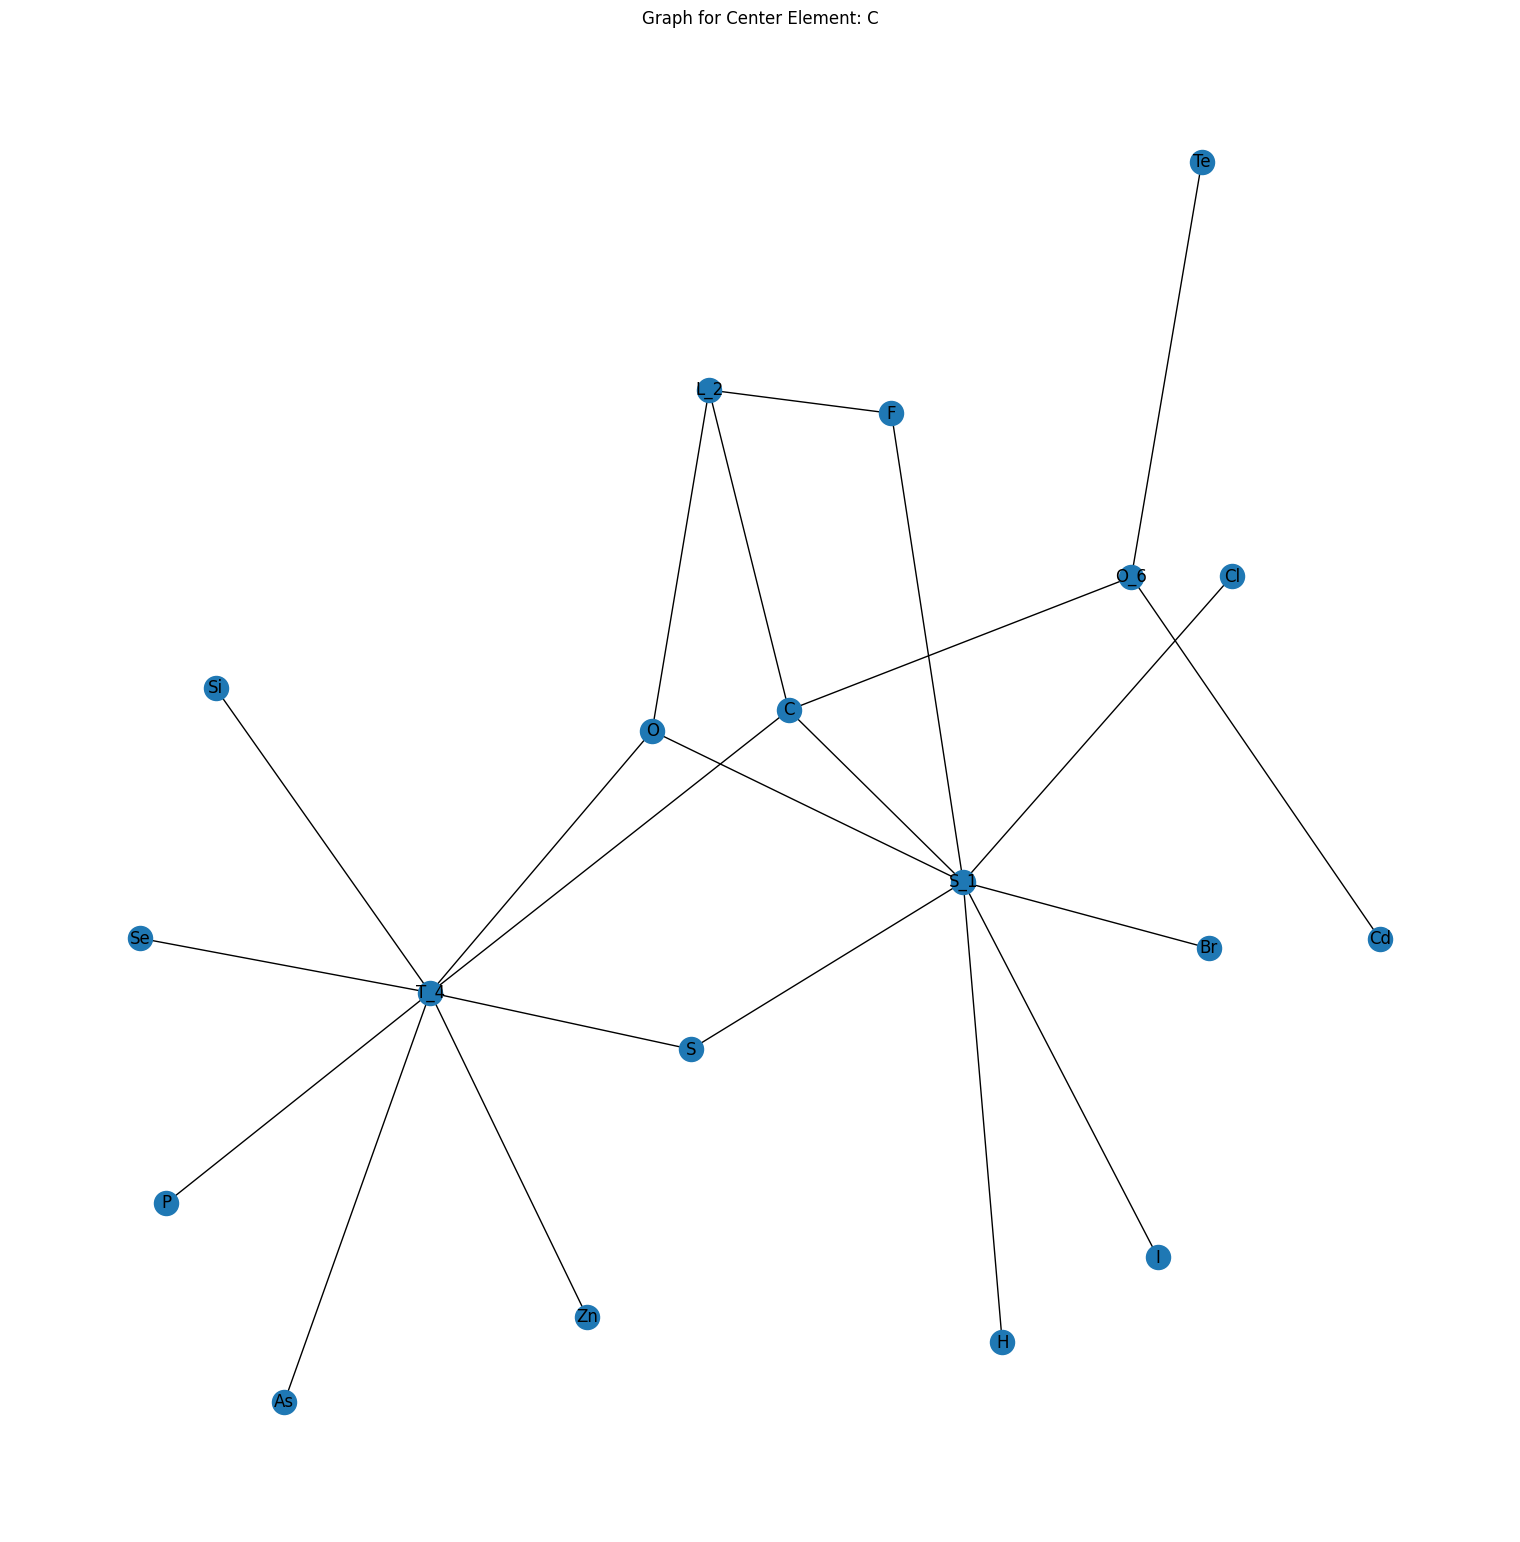

In [177]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_center_element_graph(session, element_name):
    # Fetch data using Cypher
    execute_statement = f"""MATCH (center:Element {{name: '{element_name}'}})-[r1]-(c:chemenv)
    WITH center, c ORDER BY r1.weight DESC LIMIT 10
    MATCH (c)-[r2]-(e:Element) WITH center,c,e ORDER BY r2.weight DESC LIMIT 20 
    RETURN center.name AS Center, c.name AS ChemEnv, e.name AS Element
    """

    #execute_statement = f"""MATCH (center:Element {{name: '{element_name}'}})-[r1]-(c:chemenv)
    # WITH center, COLLECT(c) AS chemenv_list LIMIT 5
    # UNWIND chemenv_list AS chemenv_node
    # MATCH (chemenv_node)-[r2]-(e:Element) WITH chemenv_node,e,center ORDER BY r2.weight DESC LIMIT 5 
    # RETURN center.name AS Center, chemenv_node.name AS ChemEnv, e.name AS Element
    # """
    data = session.run(execute_statement).data()

    # Create a networkx graph
    G = nx.Graph()
    for relationship in data:
        center = relationship['Center']
        chemenv = relationship['ChemEnv']
        element = relationship['Element']
        G.add_edge(center, chemenv)
        G.add_edge(chemenv, element)

    # Visualize the graph
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, pos, with_labels=True, node_size=300, font_size=12)
    plt.title(f'Graph for Center Element: {element_name}')
    plt.show()

# Example usage:
plot_center_element_graph(session, 'C')

[{'Structure': 'mp_1000', 'Property': -1.5056371435744094}, {'Structure': 'mp_10000', 'Property': 131.4023301801204}, {'Structure': 'mp_1001581', 'Property': 152.18624906952934}, {'Structure': 'mp_1001835', 'Property': 69.4637994468686}, {'Structure': 'mp_1002136', 'Property': 64.61289163298068}, {'Structure': 'mp_10026', 'Property': 62.823131213556294}, {'Structure': 'mp_10033', 'Property': 23.277902404071348}, {'Structure': 'mp_1005', 'Property': 159.22917121474967}, {'Structure': 'mp_1007974', 'Property': 193.24183636943175}, {'Structure': 'mp_1008555', 'Property': 128.68420612824087}, {'Structure': 'mp_1009077', 'Property': 176.89165383349751}, {'Structure': 'mp_1011695', 'Property': 11.686474138685778}, {'Structure': 'mp_1014', 'Property': 156.91943947158455}, {'Structure': 'mp_10155', 'Property': 193.22799430150368}, {'Structure': 'mp_10162', 'Property': 57.73036759599182}, {'Structure': 'mp_1017', 'Property': 133.96788635842864}, {'Structure': 'mp_1018028', 'Property': 140.57111

C:\Users\lllang\AppData\Local\Temp\ipykernel_11980\3744666480.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)


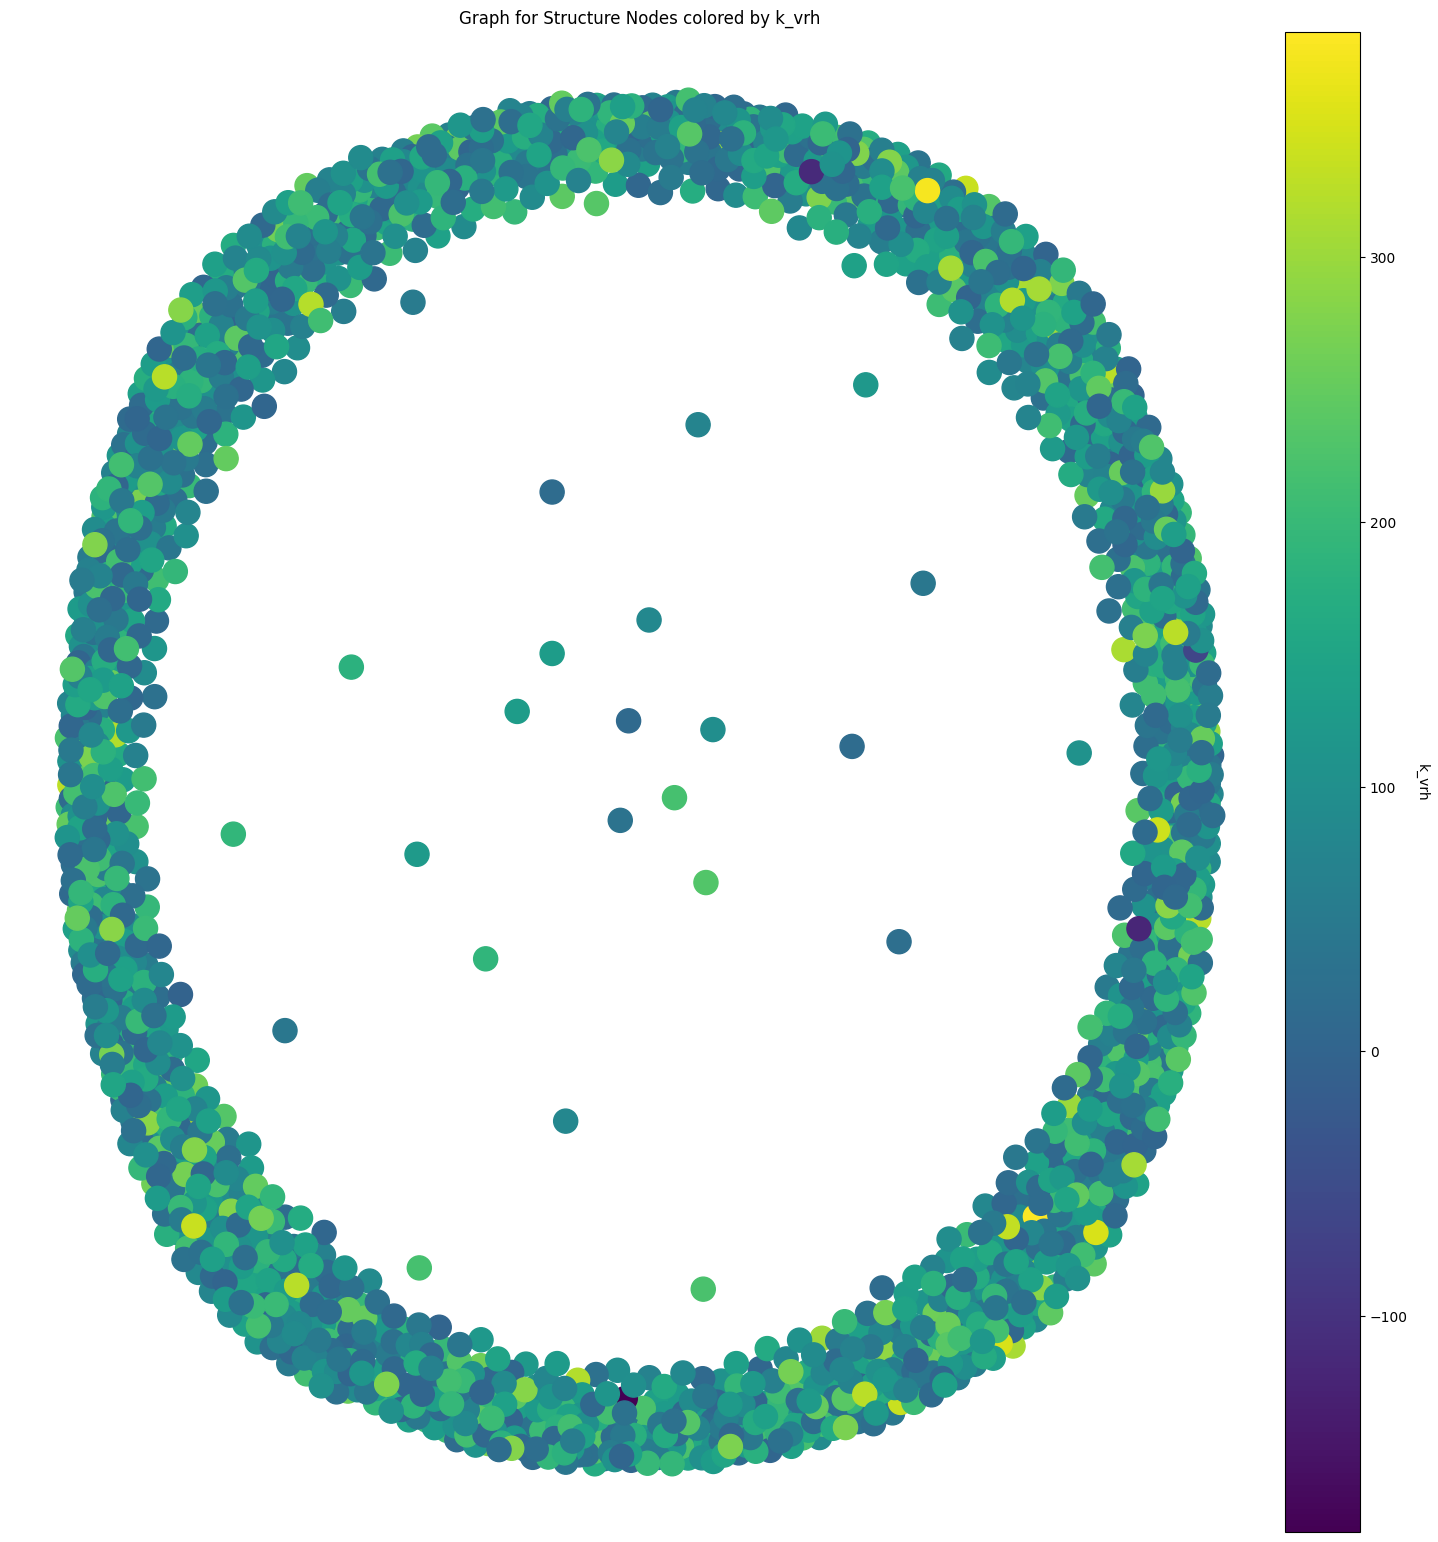

In [186]:
import matplotlib.cm as cm
import numpy as np

def plot_structure_nodes(session, property_name):
    # Fetch data using Cypher
    execute_statement = f"""MATCH (s:Structure)
    WHERE s.{property_name} <> "None"
    RETURN s.name AS Structure, s.{property_name} AS Property"""
    
    data = session.run(execute_statement).data()
    print(data)
    # Create a networkx graph
    G = nx.Graph()
    property_values = []
    
    for node_data in data:
        structure_name = node_data['Structure']
        property_value = node_data['Property']
        
        G.add_node(structure_name, value=property_value)
        property_values.append(property_value)
    
    # Convert property values to colors
    property_values = np.array(property_values)
    normed_values = (property_values - min(property_values)) / (max(property_values) - min(property_values))
    colors = cm.viridis(normed_values)
    
    # Visualize the graph
    plt.figure(figsize=(15, 15))
    # pos = nx.spring_layout(G, k=0.5)
    nx.draw(G, with_labels=False, node_size=300, font_size=12, node_color=colors)
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(vmin=min(property_values), vmax=max(property_values)))
    sm.set_array([])
    cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)
    cbar.set_label(property_name, rotation=270, labelpad=15)
    
    plt.title(f'Graph for Structure Nodes colored by {property_name}')
    plt.show()

# Example usage:
plot_structure_nodes(session, 'k_vrh')